In [1]:
import main as mn
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

%matplotlib inline

In [31]:
def show_arpes(arpes):
    data = arpes['data']
    ax0 = arpes['ax0']
    ax1 = arpes['ax1']
    
    ax0 = 16.89 - ax0
    extent = [ax1[0], ax1[-1], ax0[-1], ax0[0]]
    
    plt.imshow(data, extent = extent, aspect = 'auto')
    plt.ylim([0, 1])

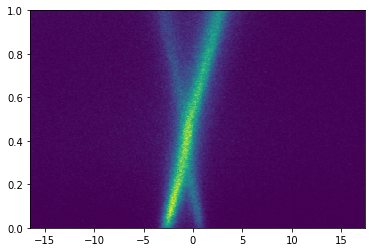

In [32]:
path = 'data/I=55/1250a.txt'
arpes = mn.read_arpes(path)
show_arpes(arpes)

In [ ]:
Ekins = arpes['ax0']
Eb = 16.89 - arpes['ax0']

ids = (Eb > 0.3) & (Eb < 0.7)
ids = np.where(ids)[0]

100%|██████████| 81/81 [00:02<00:00, 28.39it/s]


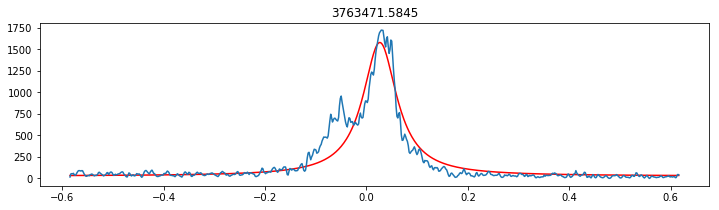

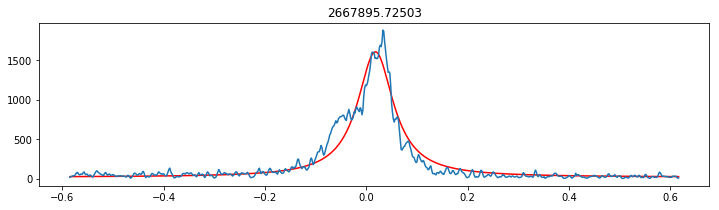

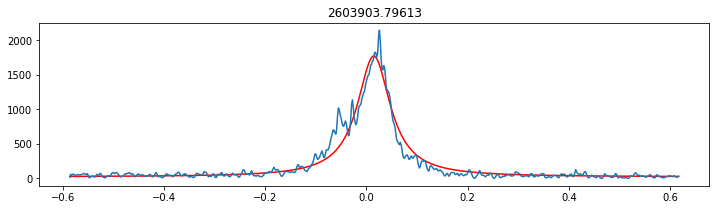

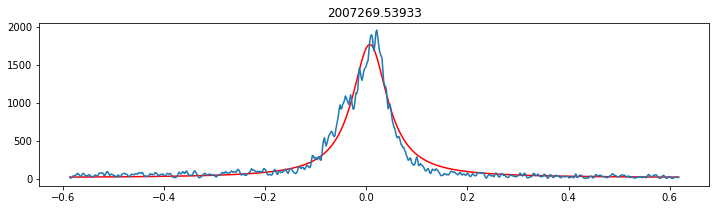

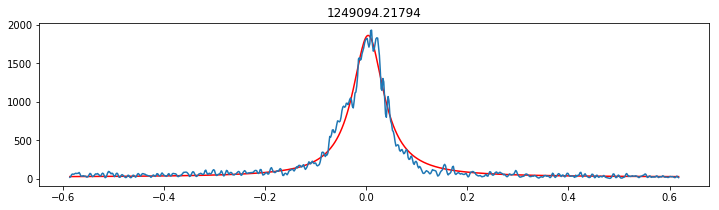

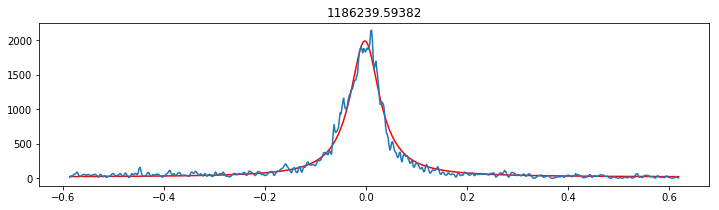

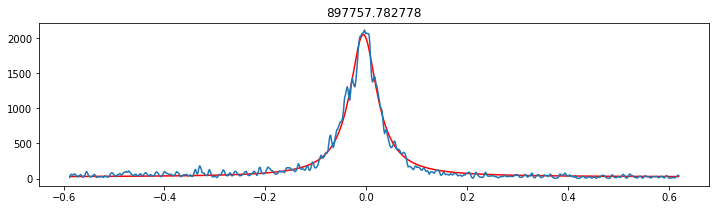

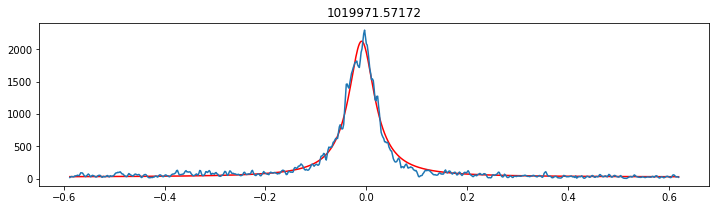

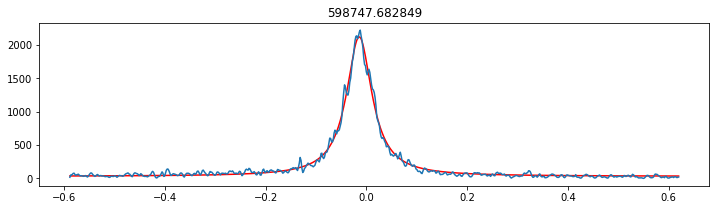

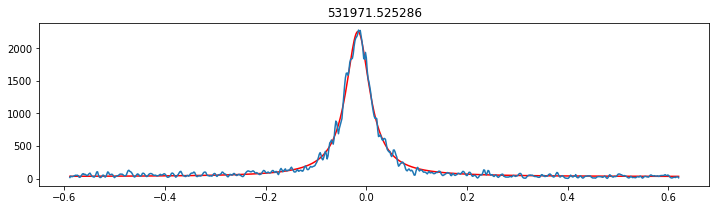

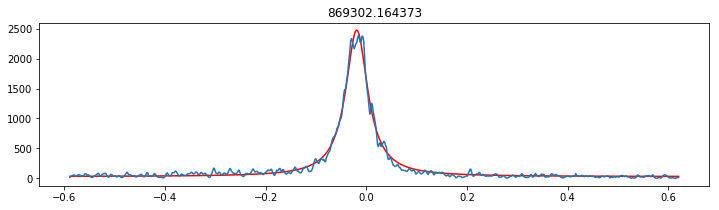

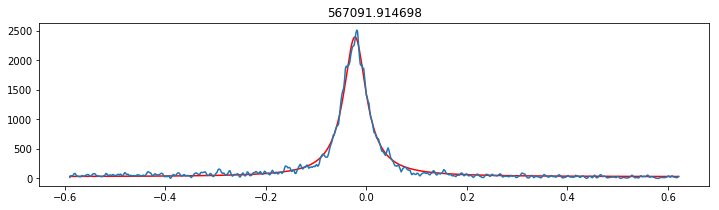

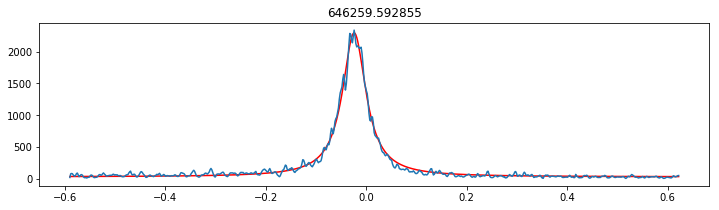

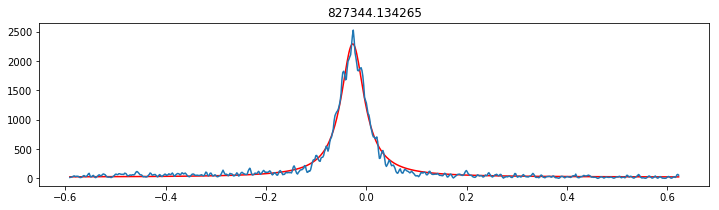

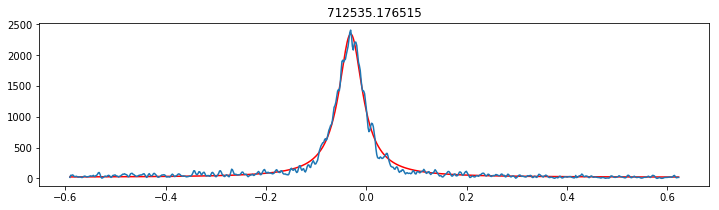

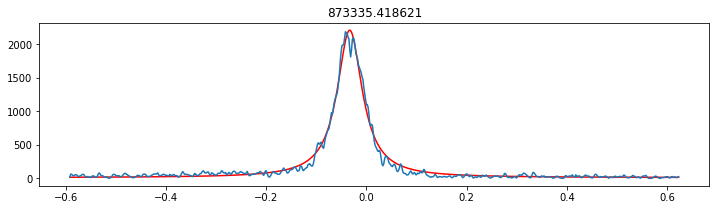

In [23]:
scores = []
for it in tqdm(ids):
    k, score = mn.fit_function(arpes, it)
    scores.append(score)
    if score.cost > 3e7:
        continue
    if it % 5 == 0:
        plt.figure(figsize = [12, 3])
        plt.title(score.cost)
        plt.plot(k, mn.lorentzian(k, score.x), c='r')
        plt.plot(k, arpes['data'][it][:-1])

In [16]:
w1 = []
cost = []
for score in scores:
    w1.append(score.x[2])
    cost.append(score.cost)

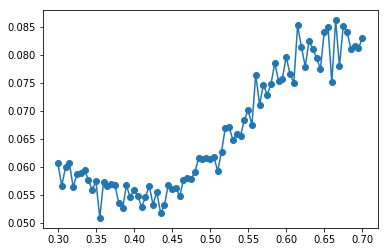

In [28]:
plt.plot(Eb[ids], w1, '-o')
plt.show()

In [12]:
w1 = np.array(w1)
ids = np.where(w1 < 0)[0]

In [13]:
for it in ids:
    score = scores[it]
    print score.cost
    plt.plot(k, mn.lorentzian(k, score.x), c='r')
    plt.plot(k, arpes['data'][it][:-1])
    plt.show()